In [2]:
import xbout
import numpy as np

In [3]:
#df = xbout.open_boutdataset("data/data_1/BOUT.dmp.*.nc")
df = xbout.open_boutdataset("data/data_1/BOUT.dmp.*.nc")
import matplotlib.pyplot as plt ; plt.show()

Read in:
<xbout.BoutDataset>
Contains:
<xarray.Dataset> Size: 262MB
Dimensions:    (t: 1000, x: 128, y: 1, z: 64)
Coordinates:
    dx         (x, y) float64 1kB dask.array<chunksize=(33, 1), meta=np.ndarray>
    dy         (x, y) float64 1kB dask.array<chunksize=(33, 1), meta=np.ndarray>
    dz         (x, y) float64 1kB dask.array<chunksize=(33, 1), meta=np.ndarray>
  * t          (t) float64 8kB 0.0 0.0 0.02 0.03 0.04 ... 9.96 9.97 9.98 9.99
  * x          (x) int64 1kB 0 1 2 3 4 5 6 7 ... 120 121 122 123 124 125 126 127
  * y          (y) float64 8B 0.5
  * z          (z) float64 512B 0.0 0.01562 0.03125 ... 0.9531 0.9688 0.9844
Data variables: (12/23)
    Apar       (t, x, y, z) float64 66MB dask.array<chunksize=(1, 33, 1, 64), meta=np.ndarray>
    Bxy        (x, y) float64 1kB dask.array<chunksize=(33, 1), meta=np.ndarray>
    G1         (x, y) float64 1kB dask.array<chunksize=(33, 1), meta=np.ndarray>
    G2         (x, y) float64 1kB dask.array<chunksize=(33, 1), meta=np.ndarray

/Users/user/miniconda3/envs/PyBout/lib/python3.10/site-packages/xbout/load.py:341: UserWarning: No geometry type found, no physical coordinates will be added
  warn("No geometry type found, no physical coordinates will be added")


In [4]:
data_omega = np.swapaxes(df.omega.values.squeeze(axis=2), 1, 2)
data_J = np.swapaxes(df.J.values.squeeze(axis=2), 1, 2)
data_A = np.swapaxes(df.Apar.values.squeeze(axis=2), 1, 2)
data_phi = np.swapaxes(df.phi.values.squeeze(axis=2), 1, 2)

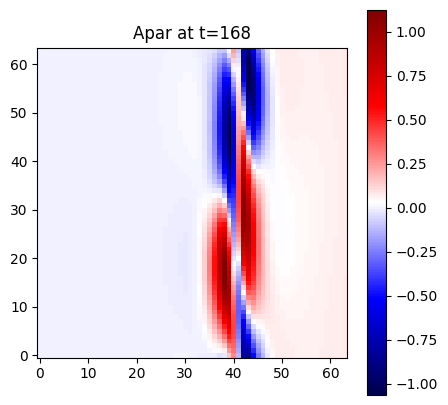

In [11]:
T=int(np.random.uniform(0, data_J.shape[0]-1))
N = 32
M = 128-32
plt.figure(figsize=(5,5))
plt.imshow(data_J[T, :, N:M], origin='lower', cmap="seismic")
plt.colorbar()
plt.title(f'Apar at t={T}')
plt.show()

/var/folders/7g/nytsqxl57z70l4gj43phb8200000gp/T/ipykernel_18681/3218576547.py:92: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  ani = animation.FuncAnimation(fig, update, frames=df.omega.shape[0], blit=True, repeat_delay=2000)
MovieWriter ffmpeg unavailable; using Pillow instead.
/var/folders/7g/nytsqxl57z70l4gj43phb8200000gp/T/ipykernel_18681/3218576547.py:96: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  ani.save(OUTPUT_NAME, fps=50)
/Users/user/miniconda3/envs/PyBout/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


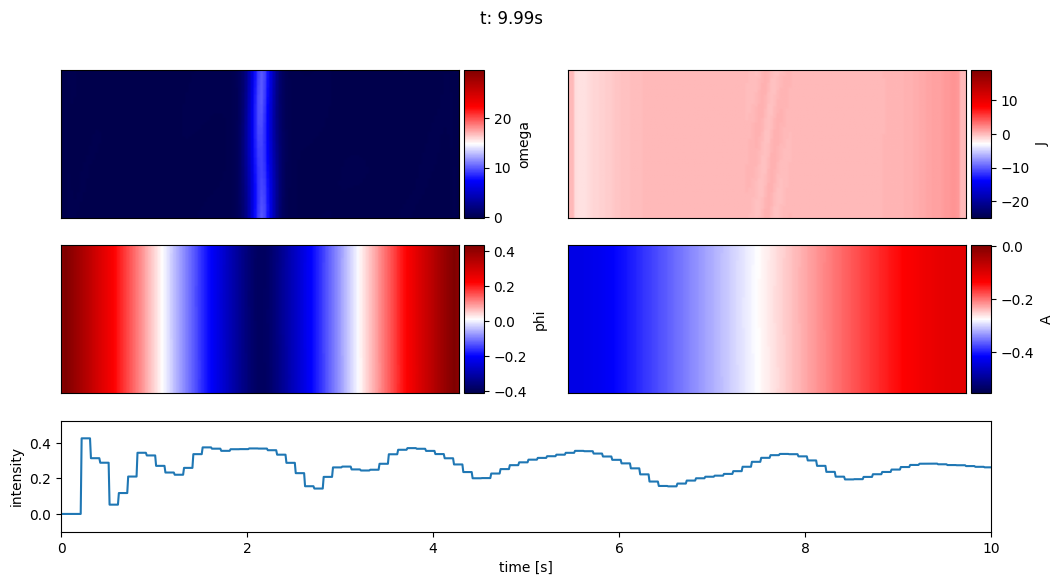

In [115]:
from matplotlib import animation
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.gridspec as gridspec

N = 0
OUTPUT_NAME = "mhd_test.gif"
labels = ["omega", "J", "phi", "A"]

fig = plt.figure(figsize=(12, 6), constrained_layout=True)
gs = gridspec.GridSpec(nrows=3, ncols=2, height_ratios=[1, 1, 0.75], width_ratios=[1, 1])

ax  = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])
ax4 = fig.add_subplot(gs[2, :])

# Create figure and axis
#fig, ((ax, ax1), (ax2, ax3)) = plt.subplots(2, 2, figsize=(8, 4.5))

vmin_o, vmax_o = data_omega.min(), data_omega.max()
vmin_J, vmax_J = data_J.min(), data_J.max()
vmin_A, vmax_A = data_A.min(), data_A.max()
vmin_phi, vmax_phi = data_phi.min(), data_phi.max()

im   = ax.imshow(data_omega[N], cmap='seismic', animated=True, vmin=vmin_o, vmax=vmax_o)
img  = ax1.imshow(data_J[N], cmap='seismic', animated=True, vmin=vmin_J, vmax=vmax_J)
img1 = ax3.imshow(data_A[N], cmap='seismic', animated=True, vmin=vmin_A, vmax=vmax_A)
img2 = ax2.imshow(data_phi[N], cmap='seismic', animated=True, vmin=vmin_phi, vmax=vmax_phi)

t = np.linspace(0, 10, 1000)
control=df.intensity.values
line = ax4.plot(t[0], control[0])[0]
ax4.set(xlim=[0, 10], ylim=[np.min(control)-.1, np.max(control) + .1], xlabel='time [s]', ylabel='intensity')


divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
divider = make_axes_locatable(ax1)
cax1 = divider.append_axes("right", size="5%", pad=0.05)
divider = make_axes_locatable(ax2)
cax2 = divider.append_axes("right", size="5%", pad=0.05)
divider = make_axes_locatable(ax3)
cax3 = divider.append_axes("right", size="5%", pad=0.05)

ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('')
ax.set_ylabel('')
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_xlabel('')
ax1.set_ylabel('')
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_xlabel('')
ax2.set_ylabel('')
ax3.set_xticks([])
ax3.set_yticks([])
ax3.set_xlabel('')
ax3.set_ylabel('')

cbar = plt.colorbar(im, cax=cax)
cbarJ = plt.colorbar(img, cax=cax1)
cbarA = plt.colorbar(img1, cax=cax2)
cbarPhi = plt.colorbar(img2, cax=cax3)
cbar.set_label(labels[0])
cbarJ.set_label(labels[1])
cbarA.set_label(labels[2])
cbarPhi.set_label(labels[3])

for ax in [ax, ax1, ax2, ax3, ax4]:
    ax.set_aspect('auto')


time = float(N/100)
title = fig.suptitle(f"t: {time:.2f}s")

def update(frame):
    im.set_array(data_omega[frame])
    img.set_array(data_J[frame])
    img1.set_array(data_A[frame])
    img2.set_array(data_phi[frame])

    line.set_xdata(t[:frame])
    line.set_ydata(control[:frame])
    time = float(frame/100)
    title.set_text(f"t: {time:.2f}s")
    return [im, img, img1, img2, line]

# Create animation
ani = animation.FuncAnimation(fig, update, frames=df.omega.shape[0], blit=True, repeat_delay=2000)


# Optional: Save video
ani.save(OUTPUT_NAME, fps=50)

# Or show inline (e.g. in Jupyter)
plt.show()

In [37]:
import numpy as np
from scipy.special import ellipk, ellipe

def coil_greens(Rc, Zc, X, Z):

    xaxis = 1.0
    dx = X - xaxis  # Distance from the axis of symmetry
    absdx = np.abs(dx)

    dx[absdx<1e-10] = 1e-10
    absdx[absdx<1e-10] = 1e-10

    k2 = 4. * absdx * Rc / (np.square(absdx + Rc) + np.square(Z - Zc))
    mu0 = 4 * np.pi * 1e-7  # Vacuum permeability [H/m]

    k2[k2<1e-10] = 1e-10
    k2[k2>1.0 - 1e-10] = 1.0 -1e-10

    k = np.sqrt(k2)

    return 2*mu0 / (2 * np.pi * k) * np.sqrt(Rc / absdx) * ((2. - k2) * ellipk(k2) - 2. * ellipe(k2)) * dx/absdx

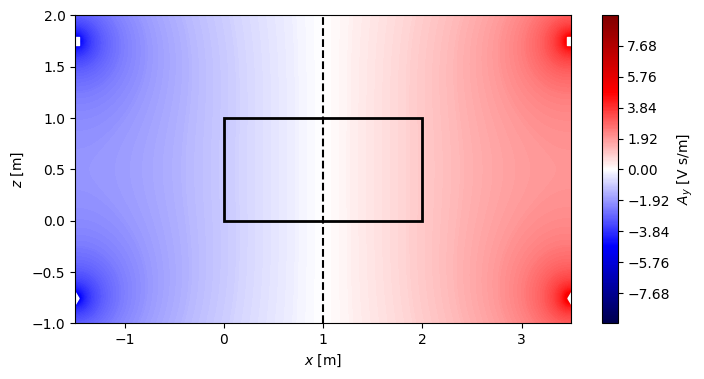

0.9955958123437924 -0.9955958123437924 0.00014197878892756216 0.9999949361963141


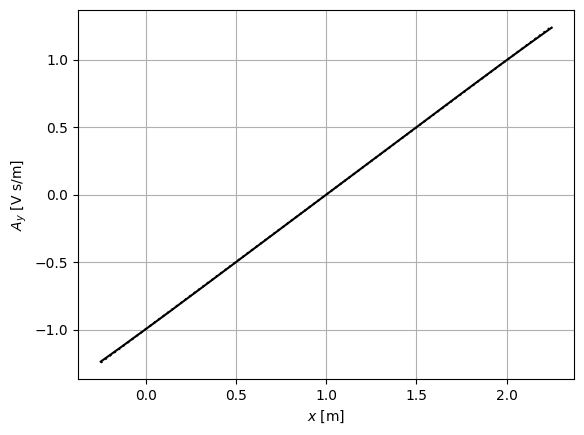

In [18]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

x = np.linspace(-1.5, 3.5, 1000)
z = np.linspace(-1, 2, 1000)

X, Z = np.meshgrid(x, z)
R = 2.5
Zc = 1.75
coil_0 = coil_greens(R, Zc, X, Z)
coil_1 = coil_greens(R, -.75, X, Z)
mu0 = 4 * np.pi * 1e-7 

Icoil = R * (5/4)**1.5 /(mu0 )

A = (coil_0 + coil_1) * Icoil

plt.figure(figsize=(8, 4))
plt.contourf(X, Z,  A, levels=500, cmap='seismic')
plt.colorbar(label='$A_y$ [V s/m]')

# Define rectangle parameters
x0, y0 = 0, 0      # bottom-left corner
width, height = 2, 1

# Get current axes and add rectangle
rect = patches.Rectangle((x0, y0), width, height, linewidth=2, edgecolor='k', facecolor='none')
plt.gca().add_patch(rect)

plt.scatter([-1.5, 3.5], [-.75, -.75], marker='d', color='w')
plt.scatter([-1.5, 3.5], [1.75, 1.75], marker='s', color='w')

plt.vlines([1.0],colors='k', ymin=-1, ymax=2, linestyles='dashed')

plt.xlabel('$x$ [m]')
plt.ylabel('$z$ [m]')
plt.show()

from scipy.stats import linregress
M = 250
MM = 750
N = 500

slope, intercept, r_value, p_value, std_err = linregress(x[M:MM], A[N, M:MM])
print(slope, intercept, std_err, r_value)

plt.figure()
plt.plot(x[M:MM], A[N, M:MM], color='k')
plt.plot(x[M:MM], slope*x[M:MM] + intercept, linestyle=':', color='k')
plt.xlabel('$x$ [m]')
plt.ylabel('$A_y$ [V s/m]')
plt.grid()
plt.show()

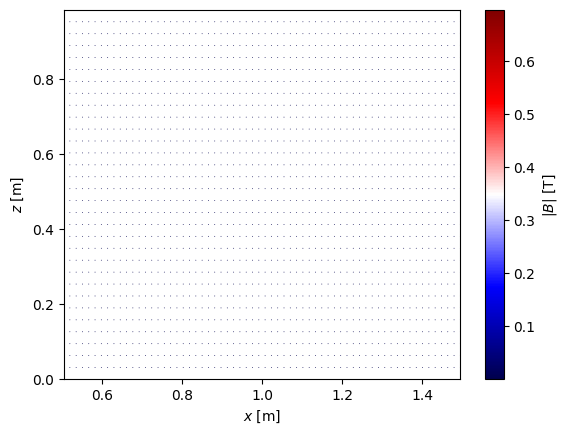

MovieWriter ffmpeg unavailable; using Pillow instead.


In [18]:
from matplotlib import animation
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.gridspec as gridspec

# Ay is a 2D array of shape (Nz, Nx) for points in (z,x)
dx = 2/128 # lx/nx
dz = 1/64

def compute_min_max(data_A):
    bmin, bmax = [], []
    for i in range(data_A.shape[0]):
        A = data_A[i,:,:]

        dAy_dx = np.gradient(A, dx, axis=1)
        dAy_dz = np.gradient(A, dz, axis=0)

        Bx = -dAy_dz
        Bz = dAy_dx

        c = np.sqrt(Bx[::step, N:M]**2 + Bz[::step, N:M]**2)
        bmin.append(c.min()) 
        bmax.append(c.max())

    clim=(np.min(bmin), np.max(bmax))
    return clim

def update(frame):
    A = data_phi[frame,:,:]

    dAy_dx = np.gradient(A, dx, axis=1)
    dAy_dz = np.gradient(A, dz, axis=0)

    Bx = -dAy_dz
    Bz = dAy_dx

    N = 32
    M = 128-32
    step = 2

    c = np.sqrt(Bx[::step, N:M]**2 + Bz[::step, N:M]**2)

    img.set_UVC(Bx[::step, N:M], Bz[::step, N:M], c)
    return [img]


xx , zz = np.linspace(0,  2, 128), np.linspace(0, 1, 64)
X, Z = np.meshgrid(xx, zz)
N = 32
M = 128-32
step = 2

A = data_A[0,:,:]

dAy_dx = np.gradient(A, dx, axis=1, edge_order=2)
dAy_dz = np.gradient(A, dz, axis=0, edge_order=2)

Bx = -dAy_dz
Bz = dAy_dx

c = np.sqrt(Bx[::step, N:M]**2 + Bz[::step, N:M]**2)

clim = compute_min_max(data_phi)


P = np.shape(xx[N:M])[0]
starts = np.column_stack([
    np.linspace(xx[N], xx[M-1], P),   # x positions
    np.zeros(P)              # all start at z = 0
])

fig = plt.figure()
img = plt.quiver(X[::step, N:M], Z[::step, N:M], Bx[::step, N:M], Bz[::step, N:M], c, 
           scale=20, scale_units='xy', angles='xy', cmap='seismic', clim=clim)
#plt.streamplot(X[::step, N:M], Z[::step, N:M], Bx[::step, N:M], Bz[::step, N:M], color='k', density=4, linewidth=0.5)
#plt.contourf(X[::step, N:M], Z[::step, N:M], data_J[500,::step,N:M], levels=50, cmap='seismic', alpha=0.2)
plt.colorbar(label='$|B|$ [T]')
plt.xlabel('$x$ [m]')
plt.ylabel('$z$ [m]')
plt.margins(0)
plt.show()

ani = animation.FuncAnimation(fig, update, frames=data_A.shape[0], blit=True, repeat_delay=2000)

OUTPUT_NAME = 'magField_paper_22.gif'
# Optional: Save video
ani.save(OUTPUT_NAME, fps=50)

# Or show inline (e.g. in Jupyter)
#plt.show()

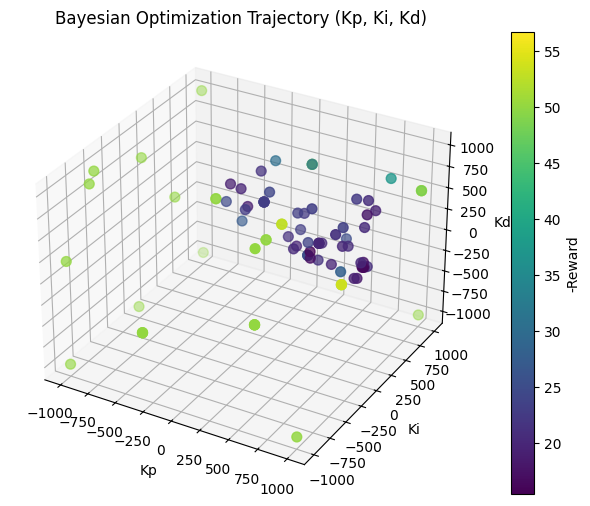

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('gp_minimize_results.csv')
params = df[['Kp', 'Ki', 'Kd']].values
rewards = df['reward'].values

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
kp_vals, ki_vals, kd_vals = params[:, 0], params[:, 1], params[:, 2]
sc = ax.scatter(kp_vals, ki_vals, kd_vals, c=rewards, cmap='viridis', s=50)

ax.set_xlabel("Kp")
ax.set_ylabel("Ki")
ax.set_zlabel("Kd")
fig.colorbar(sc, label="-Reward")
ax.set_title("Bayesian Optimization Trajectory (Kp, Ki, Kd)")
plt.show()


In [1]:
from sb3_contrib import RecurrentPPO
from kh_env import KHEnv
import pandas as pd
import numpy as np

In [9]:
# df = pd.DataFrame(columns=["Total Reward", 
#                            "Episode Length", 
#                            "Epsilon", "Phase", 
#                            "Time of Maximum Control", 
#                            "Maximum Control", 
#                            "Total Power"])


df = pd.read_csv("evaluation_stats.csv")

In [ ]:
env = KHEnv()
model_dir = "model_folder"
model_name = "model_folder/MLP test_rew_3.zip"
model = RecurrentPPO.load(model_name, env=env, print_system_info=True)



for i in range(15):
    obs, info = env.reset()

    cont = []
    state = None
    term = False    
    tot_rew = []
    i = 0


    action, state = model.predict(obs, state=state, episode_start=True,  deterministic=True)
    while not term:
        cont.append(action*1.5)
        obs, reward, term, trun, info = env.step(action)
        action, state = model.predict(obs, state=state, episode_start=False,  deterministic=True)
        tot_rew.append(reward)
        i+=1

    print("--------------------------------------------")
    print("------------------STATS---------------------")
    print("--------------------------------------------")
    print(f"    Total reward: {np.sum(env.rewards)}")
    print(f"    Total iterations: {env.iteration}")
    print(f"    Epsilon: {env.eps}")
    print(f"    Phase: {env.phase}")
    print(f"    Maximum control at time: {np.argmax(env.controls)}")
    print(f"    Maximum control: {np.max(env.controls)}")
    print(f"    Total  power control: {np.sum(env.controls)}")
    print("--------------------------------------------")
    print("------------------DONE----------------------")
    print("--------------------------------------------")

    new_row = {"Total Reward":np.sum(env.rewards), "Episode Length":env.iteration, 
            "Epsilon": env.eps, "Phase":env.phase, "Time of Maximum Control":np.argmax(env.controls), 
            "Maximum Control":np.max(env.controls), "Total Power":np.sum(env.controls)}

    df.loc[len(df)] = new_row


In [12]:
import scipy.stats as stats
import numpy as np
df = df[df['Episode Length']==100]
df = df[df['Epsilon']>=0.1]


# For a column named 'col'
mean = df['Total Power'].mean()
sem = stats.sem(df['Total Power'], nan_policy='omit')  # standard error of the mean
ci = stats.norm.interval(0.99, loc=mean, scale=sem)
print("99% confidence interval:", ci)

# correlation between time of maximum control and eps
correlation = df['Time of Maximum Control'].corr(df['Epsilon'])
print("Correlation coefficient:", correlation)

correlation = df['Total Power'].corr(df['Epsilon'])
print("Correlation coefficient:", correlation)


print(df.mean())

99% confidence interval: (np.float64(48.390870384554034), np.float64(53.236327644010416))
Correlation coefficient: -0.6829367138530203
Correlation coefficient: 0.37646998749803484
Total Reward                -2.810870
Episode Length             100.000000
Epsilon                      0.428160
Phase                        3.460759
Time of Maximum Control     38.000000
Maximum Control              1.280054
Total Power                 50.813599
dtype: float64
